Define whether the analysis is global, regional, or focused on specific countries.

Gather information from industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications relevant to the EV market.

Use historical data to identify trends in EV sales, production, and market.

Analyze the market size and growth rates for different EV segments.

Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market.

In [3]:
import pandas as pd

ev_data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

# Data Cleaning

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

For the task of market size of electric vehicles analysis, we can explore the following areas:

    EV Adoption Over Time: Analyze the growth of the EV population by model year.
    
    Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
    
    EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
    
    Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
    
    Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
    
    Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

C:\Users\musta\AppData\Local\Temp\ipykernel_19632\3439710804.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette = 'viridis')


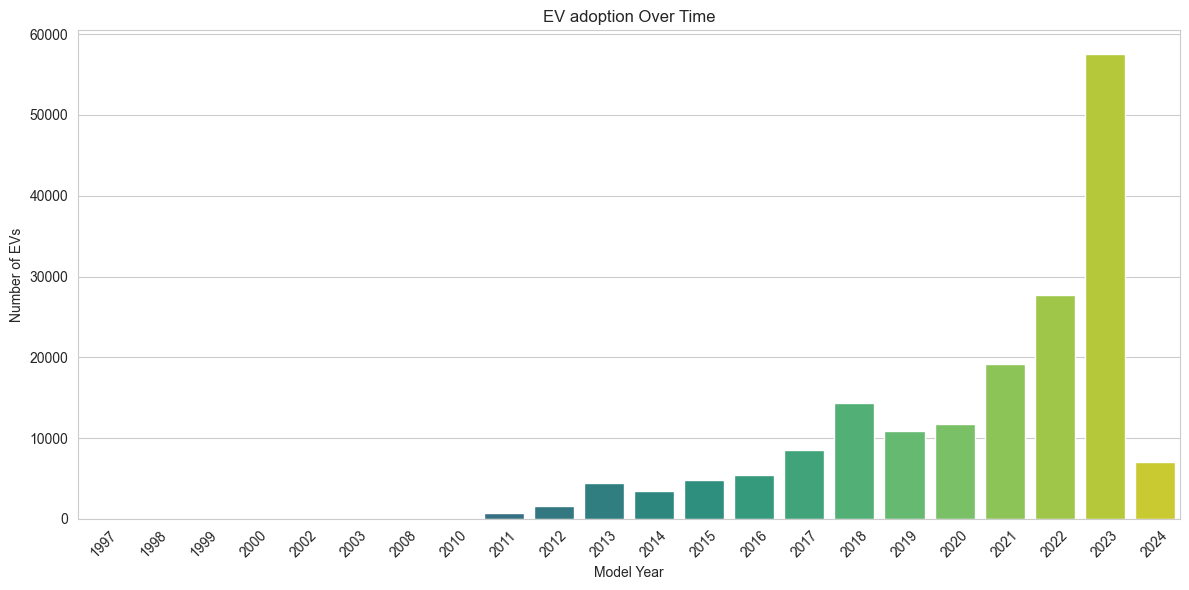

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

# EV adoption over time

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette = 'viridis')
plt.title('EV adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EV adoption has been increasing over time, especially around 2016. 2023 shows a particulary sharp increase, 2023 is peak point in EV adoption.

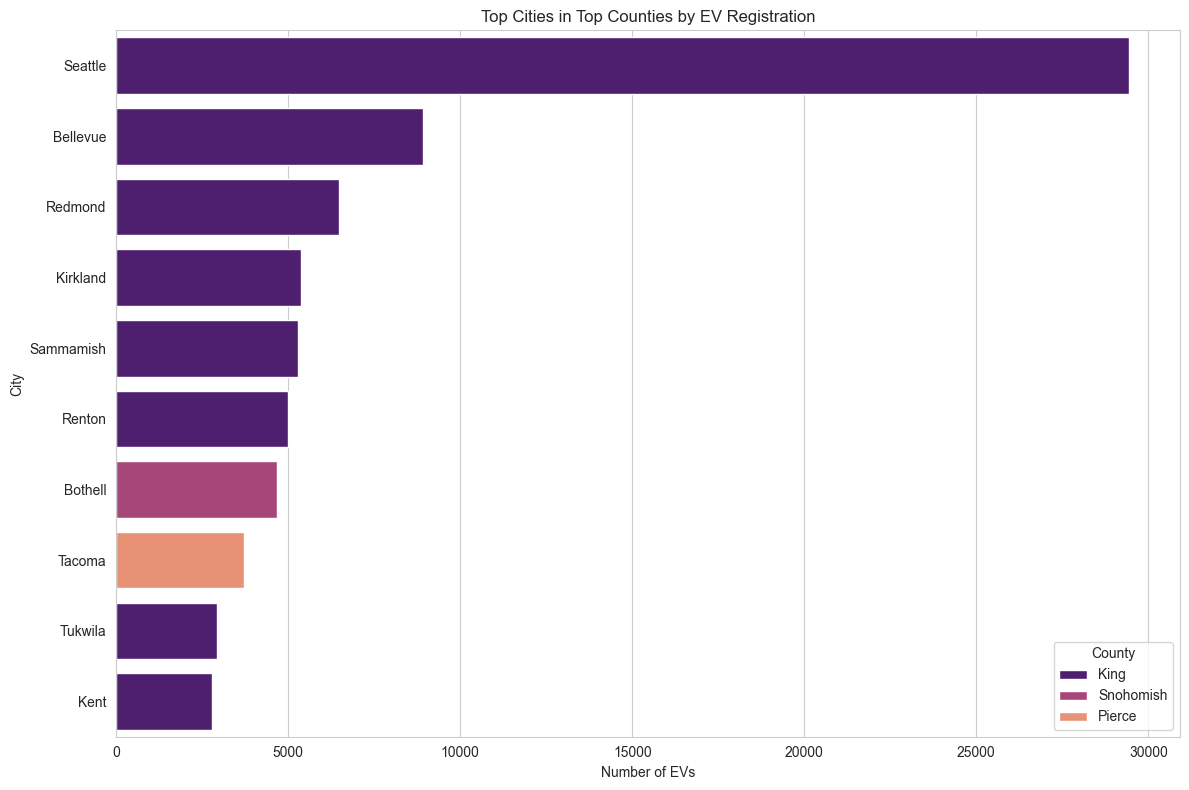

In [7]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties

ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name = 'Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x = 'Number of Vehicles', y = 'City', hue = 'County', data = top_cities, palette = 'magma')
plt.title('Top Cities in Top Counties by EV Registration')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.legend(title = 'County')
plt.tight_layout()
plt.show()

* Seattle, which is in King County, has the highest number of EV registration.
* The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties
* Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County

C:\Users\musta\AppData\Local\Temp\ipykernel_19632\2275551500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='rocket')


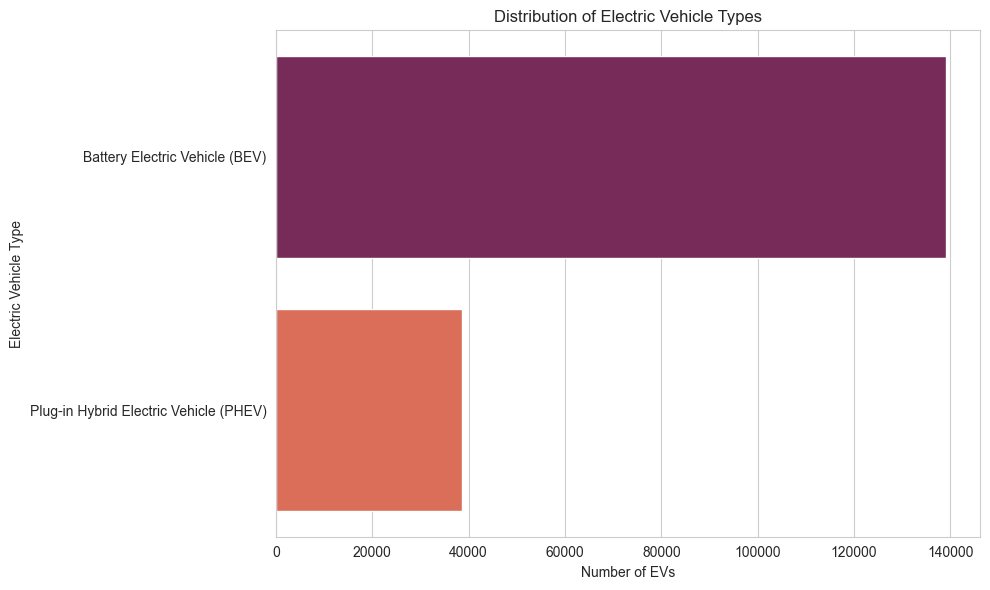

In [9]:
# Analyzing the distribution of electric vehicle types

ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='rocket')
plt.xlabel('Number of EVs')
plt.ylabel('Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.tight_layout()  
plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_19632\3799336176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette='cubehelix')


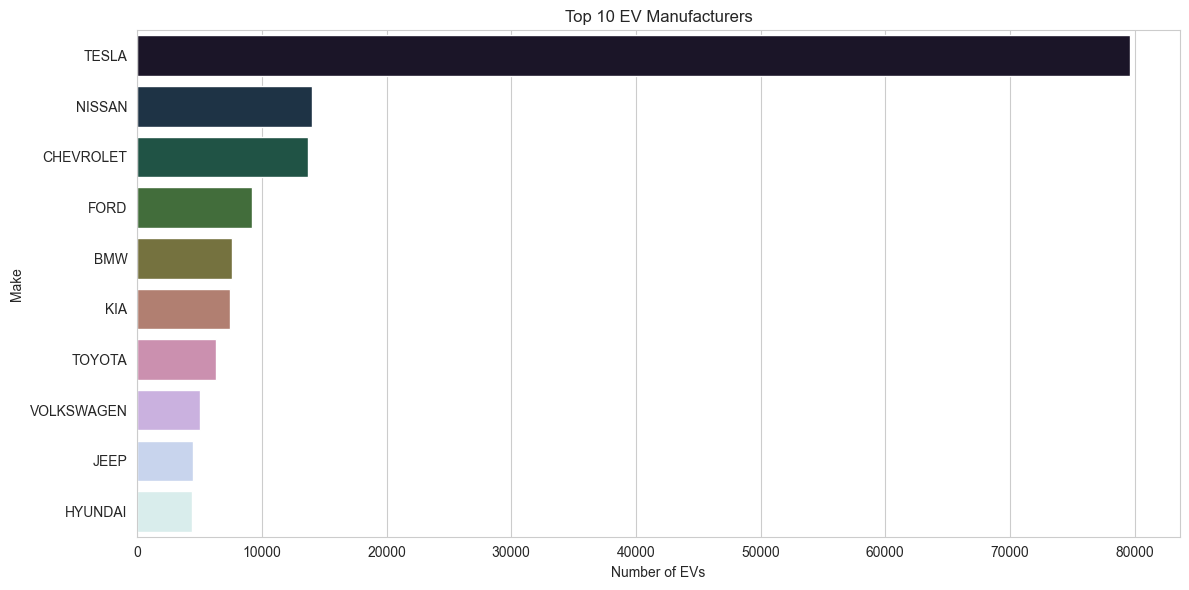

In [10]:
# Analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette='cubehelix')
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of EVs')
plt.ylabel('Make')
plt.tight_layout()
plt.show()  

* TESLA leads by a substantial margin with the highest number of vehicles registered.

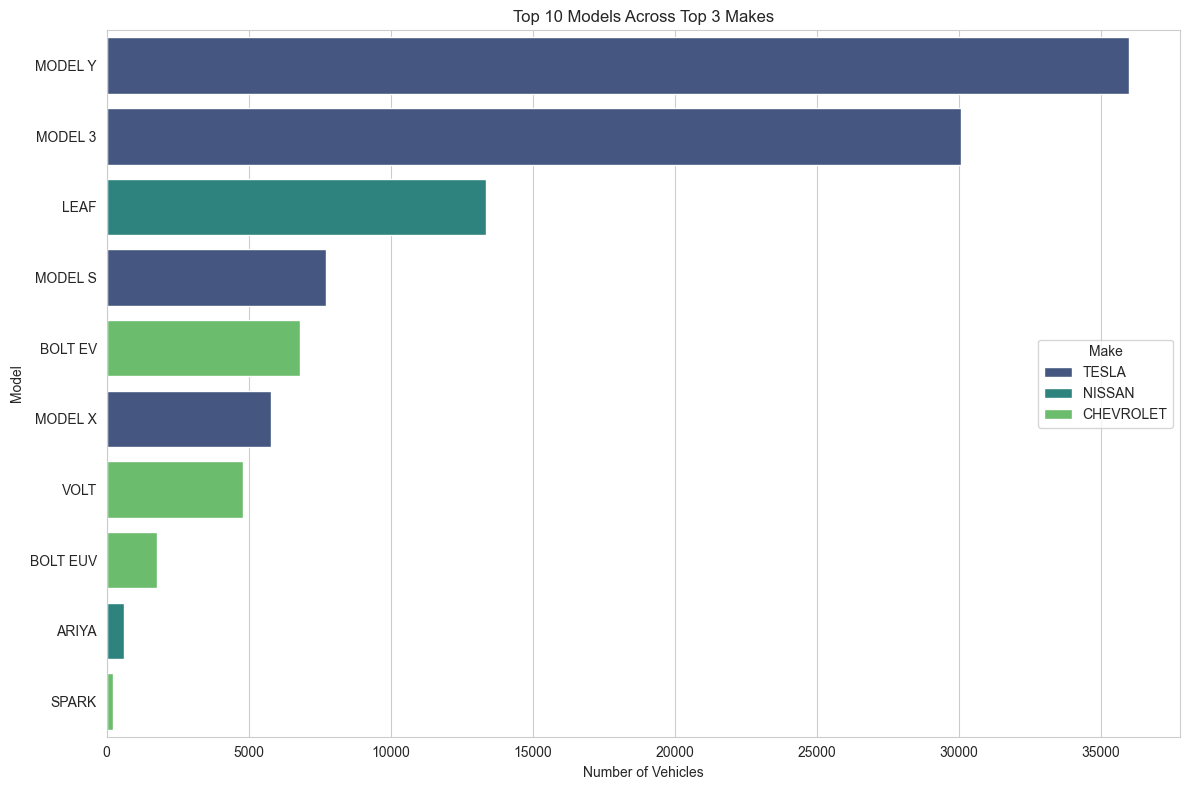

In [12]:
# Selecting the top 3 manufacturers based on the number of vehicle registered
top_3_makes = ev_make_distribution.head(3).index

# Filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending = False).reset_index(name = 'Number of Vehicles')

# Visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Number of Vehicles', y = 'Model', hue = 'Make', data = top_models, palette = 'viridis')
plt.title('Top 10 Models Across Top 3 Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.tight_layout()
plt.show()

* The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, CHEVROLET.
* MODEL Y having the highest number of registrations
* NISSAN`s LEAF is the third most registered model.

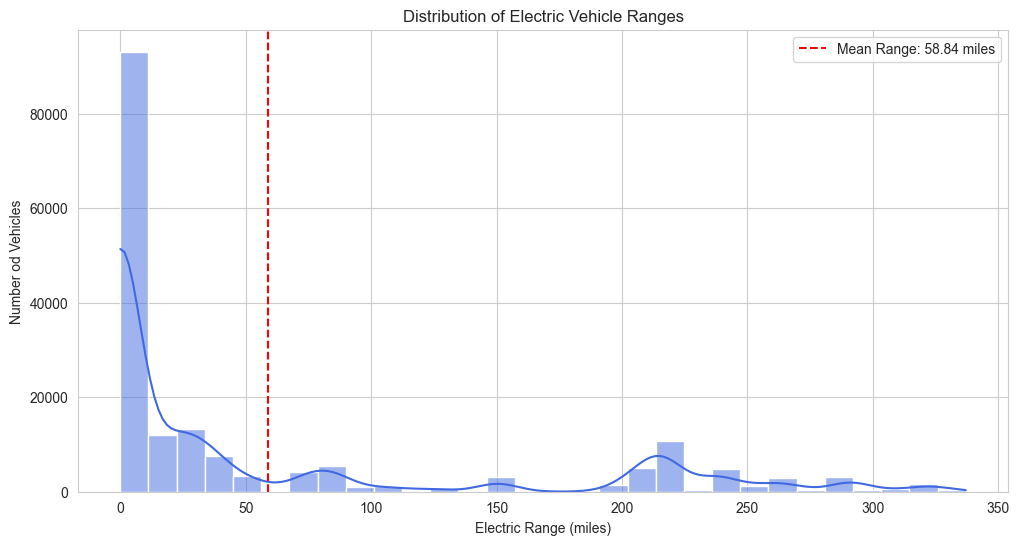

In [13]:
# Analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde = True, color = 'royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number od Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color = 'red', linestyle = '--', label = f'Mean Range: {ev_data['Electric Range'].mean():.2f} miles')
plt.legend()
plt.show()

* There is a high frequency of vehicles with a low electric range.
* The distribution is skewed to the right, with a long tail extending towards higher ranges.

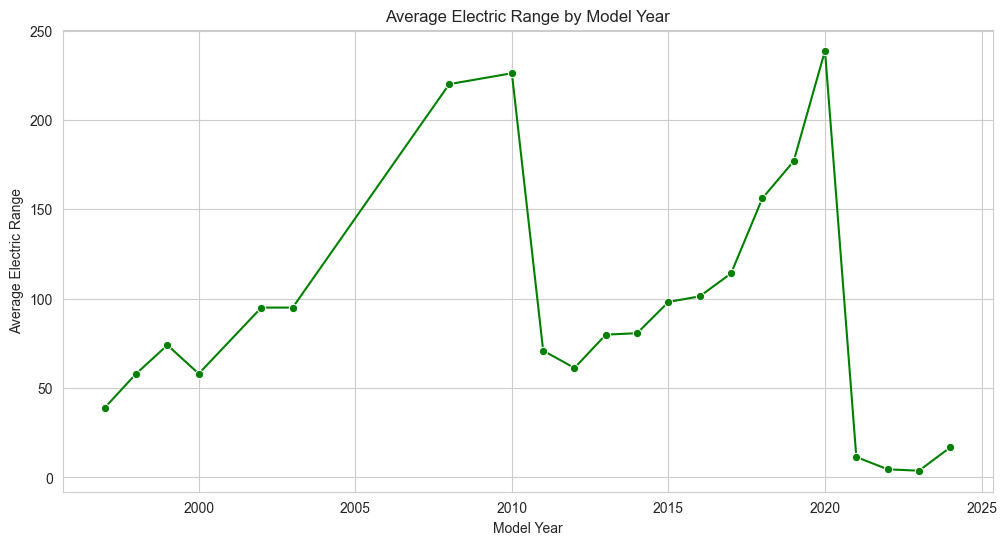

In [14]:
# Calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = average_range_by_year, marker = 'o', color = 'green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.show()

* There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
* There is a noticable peak around the year 2020.
* Following 2020, there is a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.


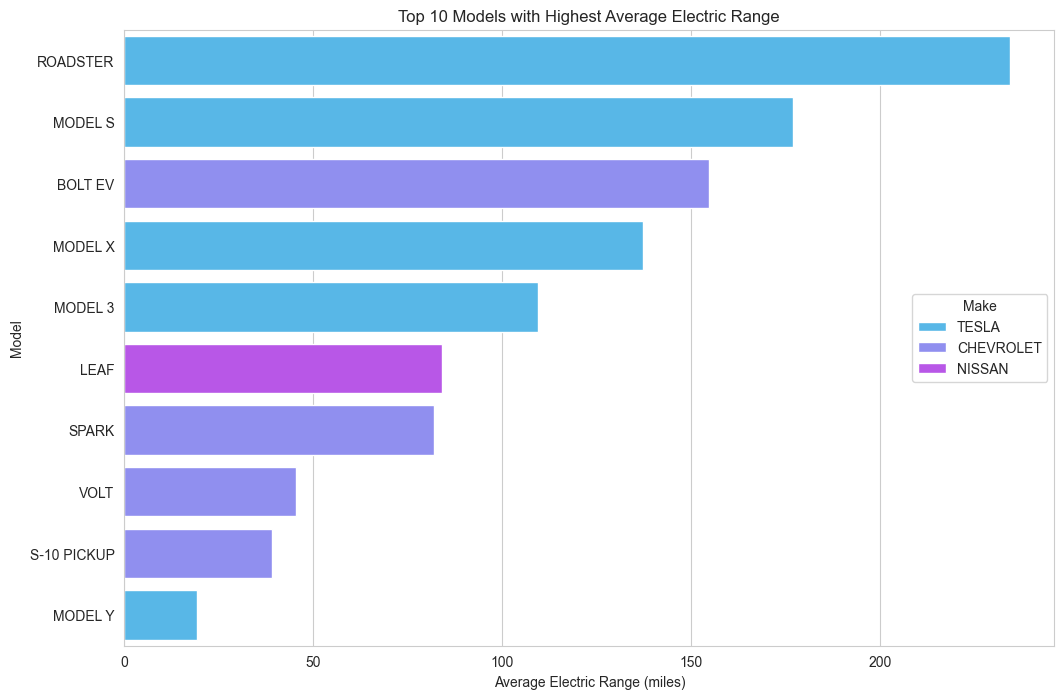

In [15]:
# Average range by model
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# The top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x = 'Electric Range', y = 'Model', hue = 'Make', data = top_range_models, palette='cool')
plt.title('Top 10 Models with Highest Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

* Tesla Roadster has the highest average electric range among the models listed
* Tesla models occupy the majority of the top positions.

In [16]:
# Calculate the number of EVs registered each year
ev_registered_counts = ev_data['Model Year'].value_counts().sort_index()
print(ev_registered_counts)

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64


The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

* In 2021, there were 19,063 EVs registered.
* In 2022, the number increased to 27708 EVs.
* In 2023, a significant jump to 57,519 EVs was observed.
* For 2024, currently, 7,072 EVs are registered, which suggests partial data.


 # Estimate the Market Size for the Next Five Years

In [17]:
from scipy.optimize import curve_fit
import numpy as np

# Filter the dayasey to include years with complete data, assuming 2023 is the last complete year
filtered_year = ev_registered_counts[ev_registered_counts.index <= 2023]

# Define the functionfor exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for curve fitting
x_data = filtered_year.index - filtered_year.index.min()
y_data = filtered_year.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Use the fitted function to forecat the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_year.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_year.index.min(), forecasted_values))
print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


### Plotting the Estimated Market Size

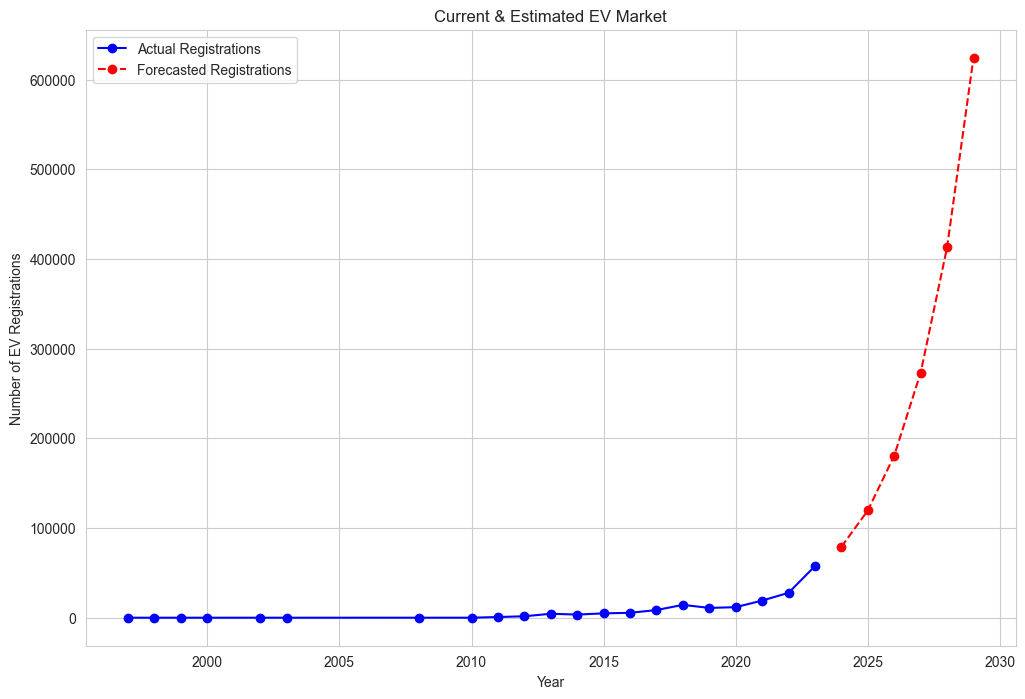

In [18]:
# Prepare data for plotting
years = np.arange(filtered_year.index.min(), 2029 + 1)
actual_years = filtered_year.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and Forecasted Values
actual_values = filtered_year.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

From the above graph, we can see:
- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.